In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import numpy as np
import pandas as pd
import re

import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as stats
import statistics

# Loading the dataset

In [3]:
dataset = pd.read_csv('train.csv')
print(dataset.shape)

dataset.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# dataset['Ticket'].unique()

In [5]:
dataset['Ticket'] = dataset['Ticket'].apply(lambda x: re.sub(r'[^a-zA-Z]', '', x))
dataset['Ticket'] = dataset['Ticket'].apply(lambda x: np.nan if x == '' else x)
dataset['Ticket'] = dataset['Ticket'].fillna('Other')

In [6]:
dataset['Ticket'].value_counts()

Other        661
PC            60
CA            41
A             28
STONO         18
SOTONOQ       15
WC            10
SCPARIS        7
SOC            6
C              5
FCC            5
LINE           4
SCParis        4
WEP            3
PP             3
SOPP           3
SOTONO         2
SCAH           2
SWPP           2
PPP            2
FC             1
SCAHBasle      1
AS             1
SOP            1
SC             1
SCOW           1
Fa             1
SP             1
SCA            1
CASOTON        1
Name: Ticket, dtype: int64

# Data Cleaning

In [7]:
dataset.drop(['Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)
print(dataset.shape)

dataset.head()

(891, 9)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


# The Target Variable

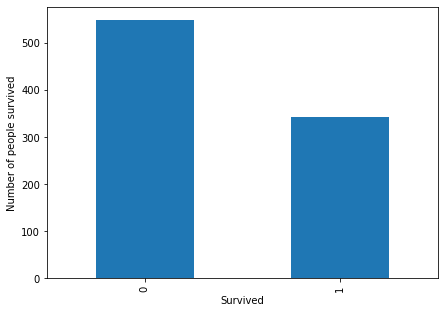

In [8]:
fig = plt.figure(figsize=(7, 5))

dataset['Survived'].value_counts().plot.bar()
plt.xlabel('Survived')
plt.ylabel('Number of people survived')

plt.show()

In [9]:
dataset['Survived'].value_counts() / len(dataset['Survived'])

0    0.616162
1    0.383838
Name: Survived, dtype: float64

**This is an imbalanced dataset. approximately 62% of the data is talking about those who didn't survive.**

# Variable Types

In [10]:
dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


## Datatypes conversion

In [12]:
dataset['Survived'] = dataset['Survived'].astype('object')
dataset['Pclass'] = dataset['Pclass'].astype('object')

In [13]:
print('Parch: ', dataset['Parch'].unique())
print('SibSp: ', dataset['SibSp'].unique())

Parch:  [0 1 2 5 3 4 6]
SibSp:  [1 0 3 4 2 5 8]


In [14]:
categorical_features = [feature for feature in dataset.columns if dataset[feature].dtype == 'O' and feature != 'Survived']
print("Total number of Categorical Features: ", len(categorical_features))

print(categorical_features)

Total number of Categorical Features:  4
['Pclass', 'Sex', 'Cabin', 'Embarked']


In [15]:
numerical_features = [feature for feature in dataset.columns if feature not in categorical_features and feature != 'Survived']
print("Total number of Numerical Features: ", len(numerical_features))

print(numerical_features)

Total number of Numerical Features:  4
['Age', 'SibSp', 'Parch', 'Fare']


# Missing Values

In [16]:
features_with_missing_values = [feature for feature in dataset.columns if dataset[feature].isnull().sum() > 0]
print('Total number of Numerical features which have null values: ', len(features_with_missing_values))

print(features_with_missing_values)

Total number of Numerical features which have null values:  3
['Age', 'Cabin', 'Embarked']


## Visualizing the percentage of missing values

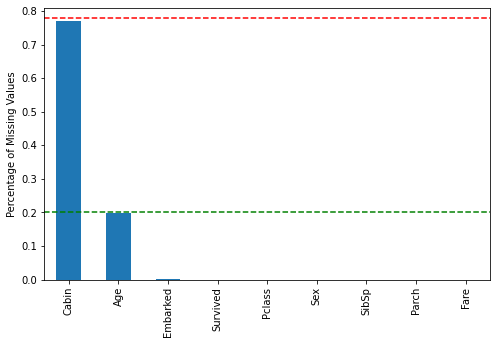

In [17]:
fig = plt.figure(figsize=(8, 5))

dataset.isnull().mean().sort_values(ascending=False).plot(kind='bar')
plt.ylabel('Percentage of Missing Values')
plt.axhline(y=0.78, linestyle = '--', color='red')
plt.axhline(y=0.2, linestyle = '--', color='green')

plt.show()

**About 80% of cabin values are missing. So I am first dropping this feature to eliminate huge artifical data.<br> Missing values in Age consisits of about 20%, We will check the distribution and dwhat to do with it.<br>I am dropping missing rows in Embarked as it consists of only 2 rows.**

In [18]:
# dataset.drop(['Cabin', 'Parch', 'SibSp'], axis = 1, inplace = True)
# dataset = dataset.dropna(axis=0, subset=['Embarked'])

dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


## Relationship between the missing values and target variable

In [19]:
def analyse_missing_data(df, feature):
    data = df.copy()
    
    data[feature] = np.where(data[feature].isnull(), 1, 0) # 1 -> value is missing and 0 -> if values is not missing
    temp_data = data.groupby(feature)['Survived'].agg('count')
    temp_data.plot(kind='barh', y='mean', color='green')
    
    plt.show()
    

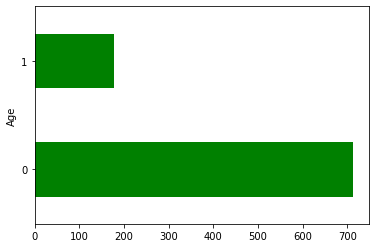

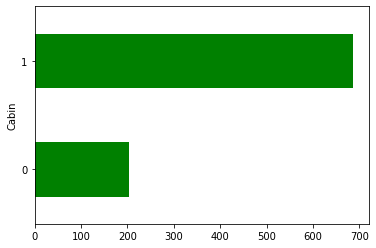

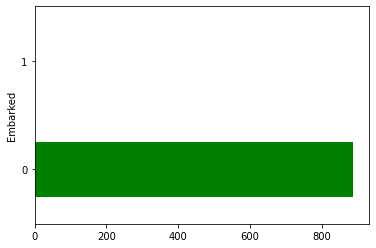

In [20]:
for feature in features_with_missing_values:
    analyse_missing_data(dataset, feature)

In [21]:
dataset['Age'].isna().sum()

177

# Numerical Features

In [22]:
print(numerical_features)

['Age', 'SibSp', 'Parch', 'Fare']


## Age

In [23]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    object 
 1   Pclass    891 non-null    object 
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 62.8+ KB


In [24]:
print("Percentage of missing values in Age: {}%".format(round((dataset['Age'].isnull().sum() / len(dataset['Age']))*100, 2)))


Percentage of missing values in Age: 19.87%


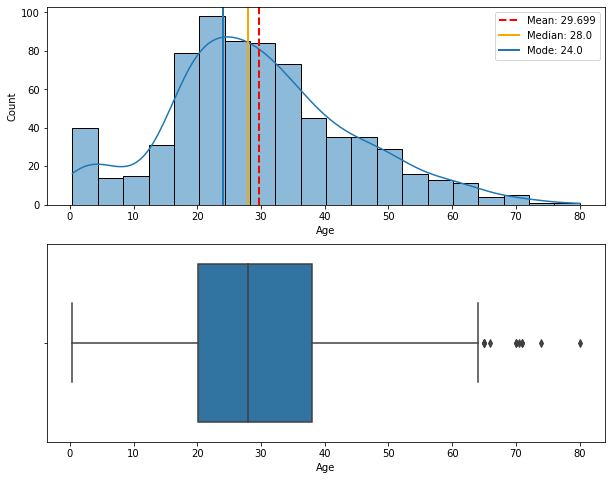

In [25]:
def plot_hist(feature):
    fig, ax = plt.subplots(2, 1, figsize=(10, 8))
    
    sns.histplot(data = dataset[feature], kde = True, ax = ax[0])

    ax[0].axvline(x = dataset[feature].mean(), color = 'r', linestyle = '--', linewidth = 2, label = 'Mean: {}'.format(round(dataset[feature].mean(), 3)))
    ax[0].axvline(x = dataset[feature].median(), color = 'orange', linewidth = 2, label = 'Median: {}'.format(round(dataset[feature].median(), 3)))
    ax[0].axvline(x = statistics.mode(dataset[feature]), linewidth = 2, label = 'Mode: {}'.format(statistics.mode(dataset[feature])))
    ax[0].legend()
    
    sns.boxplot(x = dataset[feature], ax = ax[1])
    
    plt.show()

plot_hist('Age')

**Age feature is having right skewed distribution. Let's see if we can make it closer to the famous bell-curve.**

### Median Imputation

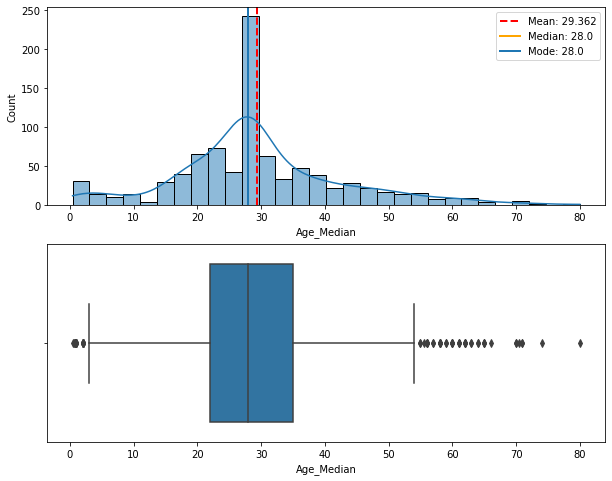

In [26]:
dataset['Age_Median'] = dataset['Age'].fillna(dataset['Age'].median())
plot_hist('Age_Median')

### End of tail imputation

In [27]:
quantile_0_75 = dataset['Age'].quantile(0.75)
quantile_0_25 = dataset['Age'].quantile(0.25)

IQR = quantile_0_75 - quantile_0_25
upper_limit = quantile_0_75 + (IQR * 1.5)
lower_limit = quantile_0_25 - (IQR * 1.5)

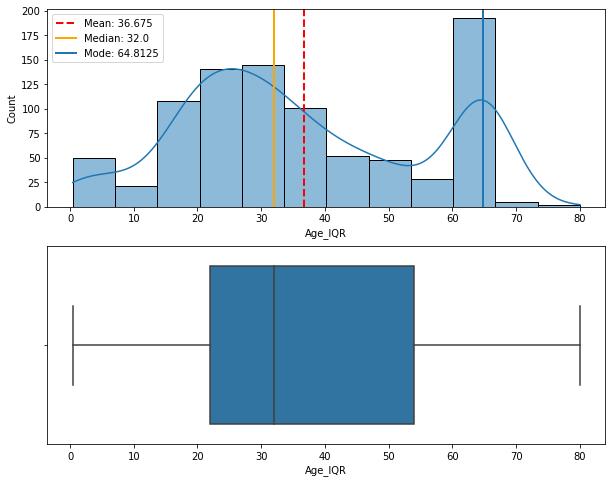

In [28]:
dataset['Age_IQR'] = dataset['Age'].fillna(upper_limit)
plot_hist('Age_IQR')

**We are creating two modes in our dataset my using IQR Imputation.**

In [29]:
dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Age_Median,Age_IQR
0,0,3,male,22.0,1,0,7.2500,NaN,S,22.0,22.0
1,1,1,female,38.0,1,0,71.2833,C85,C,38.0,38.0
2,1,3,female,26.0,0,0,7.9250,NaN,S,26.0,26.0
3,1,1,female,35.0,1,0,53.1000,C123,S,35.0,35.0
4,0,3,male,35.0,0,0,8.0500,NaN,S,35.0,35.0


In [30]:
dataset['Age'].isnull().sum()

177

### Random Sample Imputation

In [31]:
def random_sample_imputer(feature, random_state):

    dataset[feature + '_random'] = dataset[feature]

    random_sample_age = dataset[feature].dropna().sample(dataset[feature].isnull().sum(), random_state = random_state)
    random_sample_age.index = dataset[dataset[feature].isnull()].index

    dataset.loc[dataset[feature].isnull(), feature + '_random'] = random_sample_age
    
    return dataset

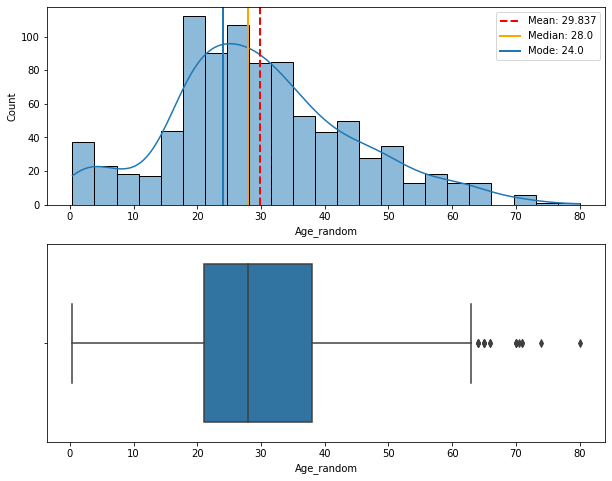

In [32]:
dataset = random_sample_imputer('Age', 1111)
plot_hist('Age_random')

**Almost looks like a normal distribution!**

#### Transformations

In [33]:
def yeojohnson(dataset, feature):
    fitted_data, lmbda = stats.yeojohnson(dataset[feature])
    sns.histplot(pd.DataFrame(fitted_data, columns=[feature]), kde=True)

    print("Mean: {}, Median: {}, Mode: {}".format(fitted_data.mean(), np.median(fitted_data), statistics.mode(fitted_data)))

In [34]:
def boxcox(dataset, feature):
    fitted_data, lmbda = stats.boxcox(dataset[feature])
    sns.histplot(pd.DataFrame(fitted_data, columns=[feature]), kde=True)

    print("Mean: {}, Median: {}, Mode: {}".format(fitted_data.mean(), np.median(fitted_data), statistics.mode(fitted_data)))

In [35]:
def log_transform(dataset, feature):
    fitted_data = np.log(dataset['Age_random'])
    sns.histplot(data = fitted_data, kde=True)

    print("Mean: {}, Median: {}, Mode: {}".format(fitted_data.mean(), np.median(fitted_data), statistics.mode(fitted_data)))

In [36]:
def power_transform(dataset, feature, power):
    fitted_data = np.power(dataset[feature], power)
    sns.histplot(data = fitted_data, kde=True)

    print("Mean: {}, Median: {}, Mode: {}".format(fitted_data.mean(), np.median(fitted_data), statistics.mode(fitted_data)))

In [37]:
def sqrt(dataset, feature):
    fitted_data = np.sqrt(dataset[feature])
    sns.histplot(data = fitted_data, kde=True)

    print("Mean: {}, Median: {}, Mode: {}".format(fitted_data.mean(), np.median(fitted_data), statistics.mode(fitted_data)))

Mean: 15.998609559488242, Median: 15.599083060986883, Mode: 13.799927984794177


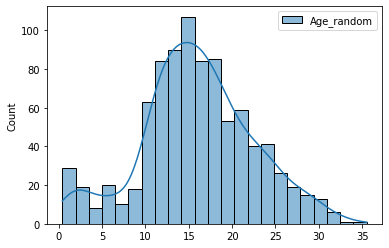

In [38]:
yeojohnson(dataset, 'Age_random')

Mean: 15.732750934429603, Median: 15.336793060086158, Mode: 13.490241943066401


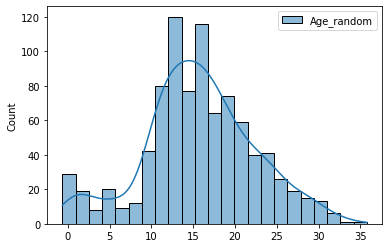

In [39]:
boxcox(dataset, 'Age_random')

Mean: 3.2054909541855126, Median: 3.332204510175204, Mode: 3.1780538303479458


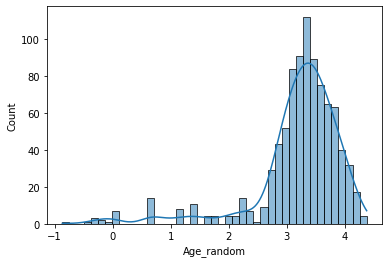

In [40]:
log_transform(dataset, 'Age_random')

Mean: 8.799595016449343, Median: 8.722735838088052, Mode: 7.891095640977314


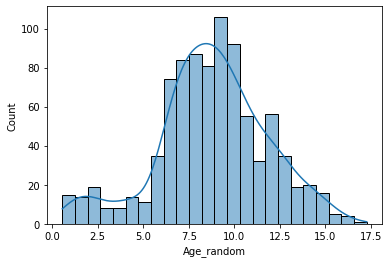

In [41]:
power_transform(dataset, 'Age_random', 0.65)

## Fare

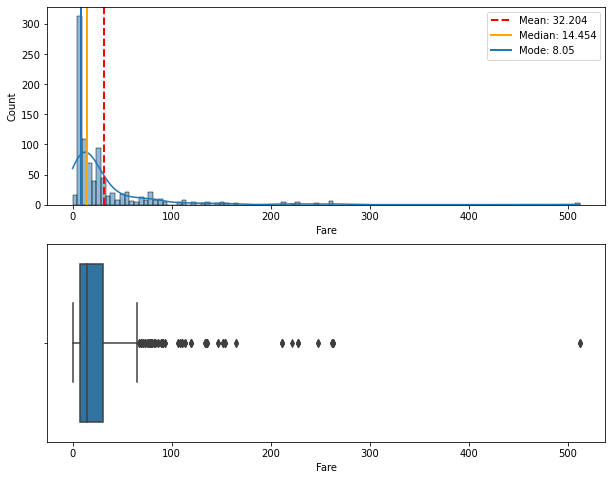

In [42]:
plot_hist('Fare')

Mean: 2.5377994102267682, Median: 2.402006479108733, Mode: 1.9816798030561618


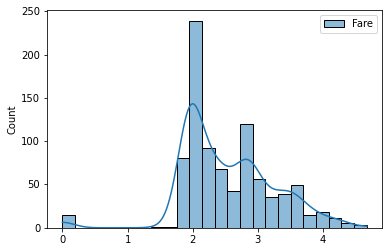

In [43]:
yeojohnson(dataset, 'Fare')

Mean: 3.2054909541855126, Median: 3.332204510175204, Mode: 3.1780538303479458


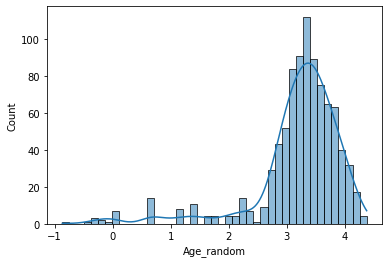

In [44]:
log_transform(dataset, 'Fare')

Mean: 4.851219519325705, Median: 3.8018679619366056, Mode: 2.8372521918222215


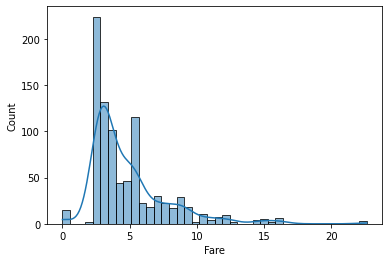

In [45]:
power_transform(dataset, 'Fare', 0.5)

Mean: 4.851219519325705, Median: 3.8018679619366056, Mode: 2.8372521918222215


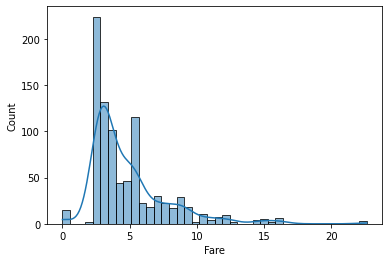

In [46]:
sqrt(dataset, 'Fare')

Mean: 1.804358006175083, Median: 1.7060777218137082, Mode: 1.5176064932892266


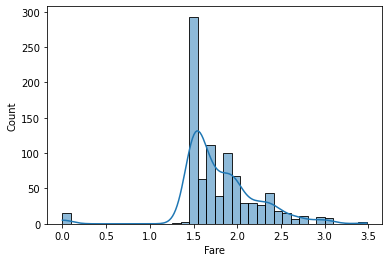

In [47]:
power_transform(dataset, 'Fare', 0.2)

## Analysis on Target variable

In [48]:
dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Age_Median,Age_IQR,Age_random
0,0,3,male,22.0,1,0,7.2500,NaN,S,22.0,22.0,22.0
1,1,1,female,38.0,1,0,71.2833,C85,C,38.0,38.0,38.0
2,1,3,female,26.0,0,0,7.9250,NaN,S,26.0,26.0,26.0
3,1,1,female,35.0,1,0,53.1000,C123,S,35.0,35.0,35.0
4,0,3,male,35.0,0,0,8.0500,NaN,S,35.0,35.0,35.0


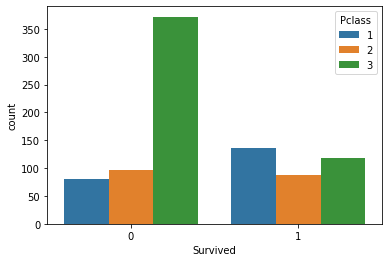

In [49]:
sns.countplot(x='Survived', data=dataset, hue='Pclass')

plt.show()

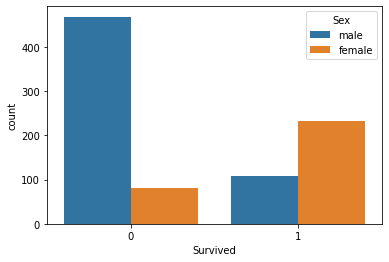

In [50]:
sns.countplot(x='Survived', hue='Sex', data=dataset)

plt.show()

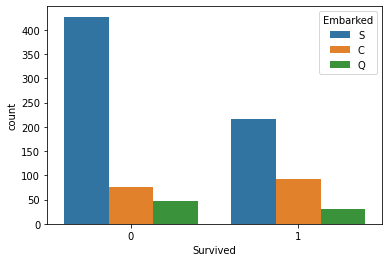

In [51]:
sns.countplot(data=dataset, x='Survived', hue='Embarked')

plt.show()

# Categorical Variables

In [52]:
categorical_features.remove('Cabin')

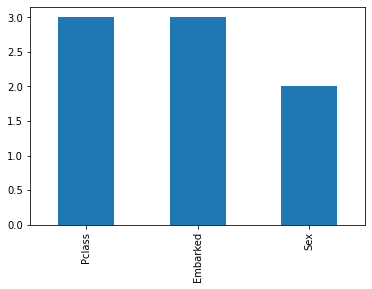

In [53]:
dataset[categorical_features].nunique().sort_values(ascending=False).plot(kind='bar')

plt.show()

## Remapping Categorical Variables

In [54]:
pClass_mappings = {1: 'Upper', 2: 'Middle', 3: 'Lower'}
embarked_mappings = {'C': 'Cherbourg', 'Q': 'Queenstown', 'S': 'Southampton'}

In [55]:
dataset['Pclass'] = dataset['Pclass'].map(pClass_mappings)
dataset['Embarked'] = dataset['Embarked'].map(embarked_mappings)


In [56]:
dataset[categorical_features].head()

,Pclass,Sex,Embarked
0,Lower,male,Southampton
1,Upper,female,Cherbourg
2,Lower,female,Southampton
3,Upper,female,Southampton
4,Lower,male,Southampton
